In [13]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"IMDb Movies India.csv" ,encoding=('ISO-8859-1'))
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [15]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

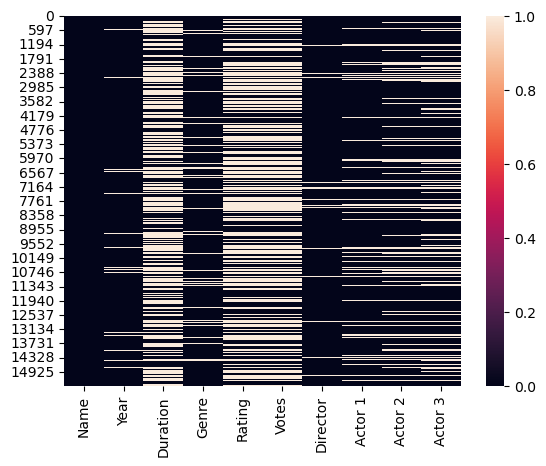

In [16]:
sns.heatmap(df.isna())

In [17]:
df.dropna(subset=['Rating'],inplace=True)

In [18]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [19]:
df.isna().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [20]:
df['Year']=df['Year'].str.strip('()').astype(int)

In [21]:
df['Votes']=df['Votes'].str.replace(',','').astype(int)

In [22]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [23]:
df['Duration'].fillna(df['Duration'].median(),inplace=True)

In [24]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [25]:
df[df['Duration']>=180]['Name']

63          23rd March 1931: Shaheed
239                      Aag Ka Gola
441      Aap Mujhe Achche Lagne Lage
451                      Aar Ya Paar
490      Aasma: The Sky Is the Limit
                    ...             
14955                       Wafadaar
14968                         Wajood
15051           What's Your Raashee?
15054                When Love Calls
15178                        Yalgaar
Name: Name, Length: 156, dtype: object

In [26]:
print("Before conversion:")
print(df.dtypes)

# Convert the 'Year' column to numeric, coercing errors
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Check the data types after conversion
print("\nAfter conversion:")
print(df.dtypes)

Before conversion:
Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

After conversion:
Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [27]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Convert the 'Votes' column to numeric, coercing errors
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
# Perform the aggregation
mean_year = df['Year'].mean()
mean_votes = df['Votes'].mean()

print(f"Mean of 'Year': {mean_year}")
print(f"Mean of 'Votes': {mean_votes}")

Mean of 'Year': 1993.421010849431
Mean of 'Votes': 2029.1238422863191


In [28]:
df.groupby("Year")['Votes'].mean().sort_values(ascending=False)

Year
2012    8833.458599
2016    6376.586957
2007    6084.388489
2020    5193.382166
2013    4890.944444
           ...     
1944      13.454545
1938       9.714286
1932       9.000000
1934       8.500000
1939       8.250000
Name: Votes, Length: 92, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

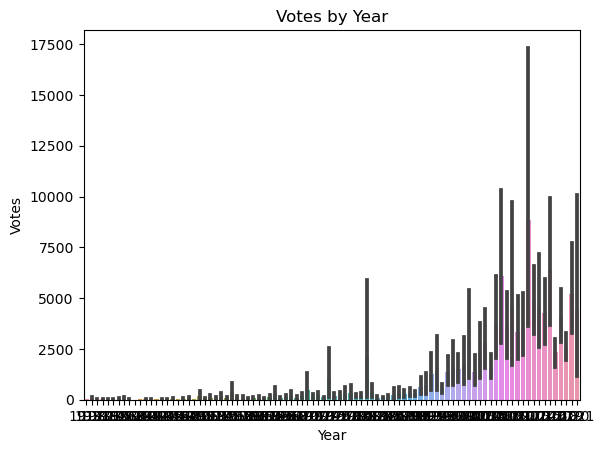

In [29]:
sns.barplot(x=df['Year'],y=df["Votes"])
plt.title("Votes by Year")
plt.show

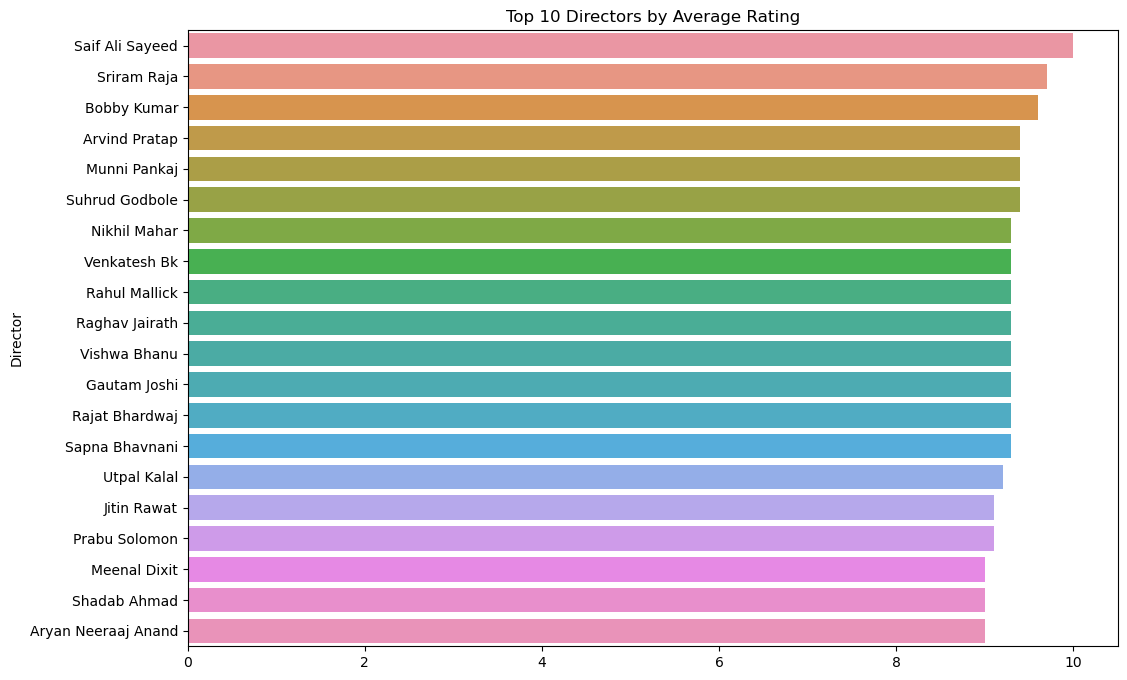

In [30]:
avg_rating_per_director = df.groupby("Director")['Rating'].mean().sort_values(ascending=False)
top10_directors = avg_rating_per_director.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_directors.values, y=top10_directors.index)
plt.title('Top 10 Directors by Average Rating')
plt.show()

Text(0.5, 1.0, 'Top 5 Durations')

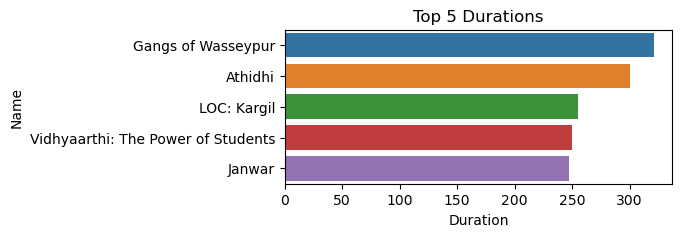

In [31]:
top5_len=df.nlargest(5,'Duration')[['Name','Duration']].set_index('Name')
top5_len
plt.figure(figsize=(5, 2))
sns.barplot(x=top5_len['Duration'], y=top5_len.index)
plt.title('Top 5 Durations')

C:\Users\neham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\neham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

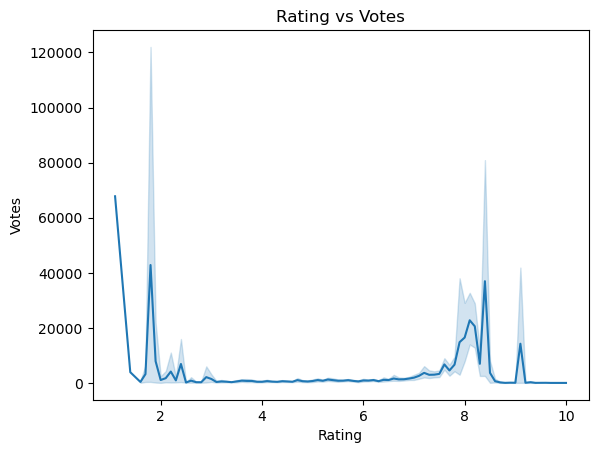

In [32]:
df.groupby("Year")['Rating'].mean().sort_values(ascending=False)
sns.lineplot(x=df['Rating'],y=df["Votes"])
plt.title("Rating vs Votes")
plt.show

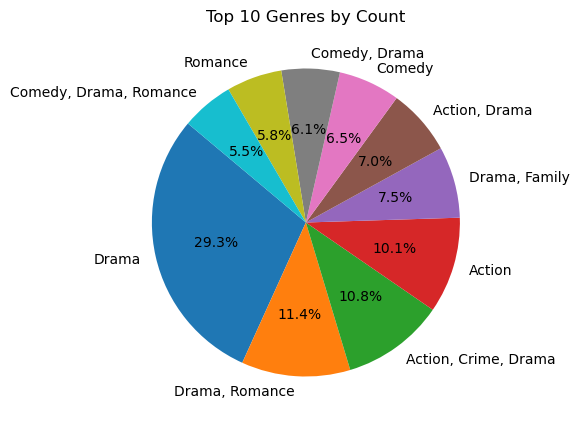

In [33]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top 10 genres
top5_genres = genre_counts.head(10)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top5_genres['Count'], labels=top5_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genres by Count')
plt.show()

In [35]:
filtered_df=df[(df['Rating']>8) &(df['Votes']>10000)]
filtered_df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte


C:\Users\neham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\neham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


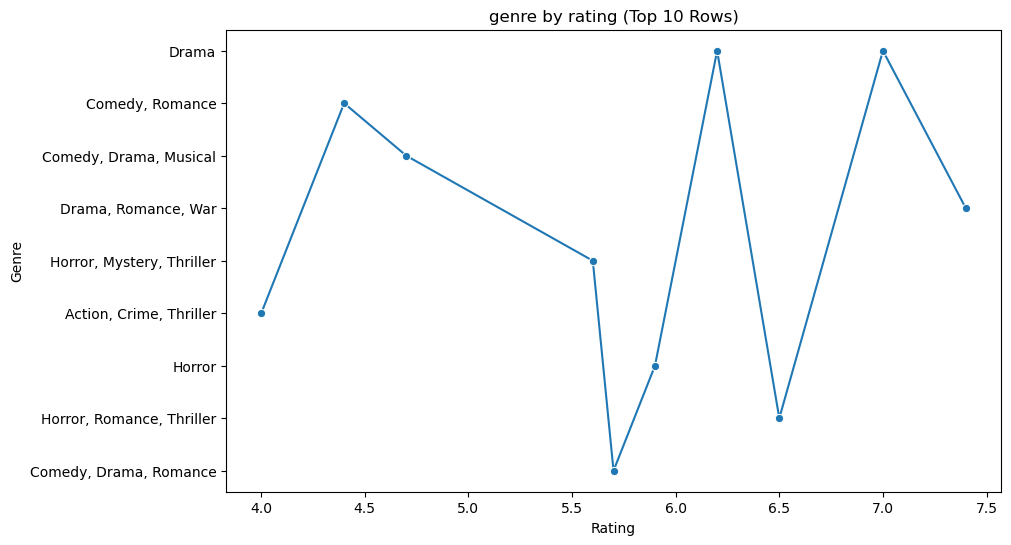

In [36]:
top10_df = df.head(10)
plt.figure(figsize=(10, 6))
sns.lineplot(x=top10_df['Rating'], y=top10_df['Genre'], marker='o')
plt.title('genre by rating (Top 10 Rows)')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
trans_df=df.drop('Name', axis=1)
trans_df['Director']=le.fit_transform(df['Director'])
trans_df['Actor 1']=le.fit_transform(df['Actor 1'])
trans_df['Actor 2']=le.fit_transform(df['Actor 2'])
trans_df['Actor 3']=le.fit_transform(df['Actor 3'])
trans_df['Genre']=le.fit_transform(df['Genre'].apply(lambda x:', '.join(x)))
trans_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,252,7.0,8,755,1686,2725,373
3,2019,110.0,205,4.4,35,1637,1500,865,2543
5,1997,147.0,175,4.7,827,1881,481,84,2422
6,2005,142.0,315,7.4,1086,2486,878,1346,2996
8,2012,82.0,351,5.6,326,161,2385,1416,1189


In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms_data = mms.fit_transform(trans_df)
mms_df = pd.DataFrame(mms_data,columns=trans_df.columns)
mms_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


<Axes: >

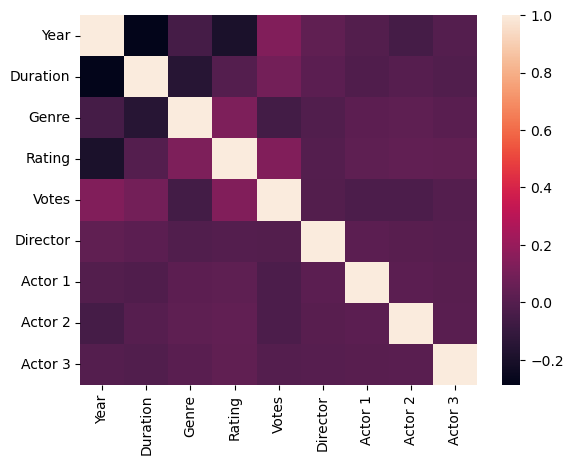

In [41]:
corr_df = trans_df.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)
sns.heatmap(corr_df,annot=False)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
x = trans_df.drop('Rating', axis=1)
y = trans_df['Rating']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [44]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [48]:
xtest=(xtest)

In [49]:
y_pred = model.predict(xtest)
y_pred

C:\Users\neham\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.42920937, 6.48556147, 6.41867811, ..., 5.72690199, 5.59118065,
       5.91944168])

In [54]:
"r2_score:",r2_score(ytest,y_pred)

('r2_score:', 0.0965919489185616)

In [55]:
"mean squared error:",mean_squared_error(ytest,y_pred)

('mean squared error:', 1.5929482001969513)

In [56]:
"mean absolute error:",mean_absolute_error(ytest,y_pred)

('mean absolute error:', 1.0104256419821587)

In [57]:
ytest

8944     6.7
1740     8.0
14486    5.4
488      6.1
4322     4.6
        ... 
12834    5.4
14507    7.5
2522     4.9
13378    6.7
11038    5.9
Name: Rating, Length: 1512, dtype: float64